In [2]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from sklearn.feature_selection import mutual_info_classif
from keras.layers import LeakyReLU

# DOI 10.24432/C5HP4Z

In [3]:
nomes_colunas = ['Sample_code_number', 'Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class']

In [5]:
df = pd.read_csv('breast-cancer-wisconsin.data')
df.columns = nomes_colunas

In [6]:
df.head()

,Sample_code_number,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample_code_number           698 non-null    int64 
 1   Clump_thickness              698 non-null    int64 
 2   Uniformity_of_cell_size      698 non-null    int64 
 3   Uniformity_of_cell_shape     698 non-null    int64 
 4   Marginal_adhesion            698 non-null    int64 
 5   Single_epithelial_cell_size  698 non-null    int64 
 6   Bare_nuclei                  698 non-null    object
 7   Bland_chromatin              698 non-null    int64 
 8   Normal_nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [526]:
df['Class'].value_counts()

Class
2    457
4    241
Name: count, dtype: int64

In [527]:
df.drop(columns=['Sample_code_number'], inplace=True)
df.replace('?', np.nan, inplace=True)
df = df.astype('float64')
df.dropna(inplace=True)

In [528]:
X = df.drop(columns=['Class'])
y = df['Class']

### InfoGain

In [529]:
mutual_info = mutual_info_classif(X, y)
info_gains = {X.columns[i]: mutual_info[i] for i in range(len(X.columns))}
info_gains = sorted(info_gains.items(), key=lambda x: x[1], reverse=True)
for col, mi in info_gains:
    print(f'{col}: {mi}')

Uniformity_of_cell_size: 0.48396514181201233
Uniformity_of_cell_shape: 0.4601941918519572
Bare_nuclei: 0.40883456418118413
Bland_chromatin: 0.37732428760894576
Single_epithelial_cell_size: 0.3483448535506828
Normal_nucleoli: 0.32993570199034084
Clump_thickness: 0.3197409702515752
Marginal_adhesion: 0.3135487418256846
Mitoses: 0.1266982465520321


### Divisão entre treino e teste

In [530]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32, stratify=y) # É bom usar stratify y pois
                                                                                                  #  as classes estão desbalanceadas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [531]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

optimizer = Adam(learning_rate=0.0001)

model = Sequential()
model.add(Dense(8, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


C:\Users\isac_\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 4.6069e-04 - loss: 1.7408 - val_accuracy: 0.0073 - val_loss: 1.6839
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0089 - loss: 1.6778 - val_accuracy: 0.0730 - val_loss: 1.6328
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0619 - loss: 1.6245 - val_accuracy: 0.1241 - val_loss: 1.5874
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1813 - loss: 1.5816 - val_accuracy: 0.3796 - val_loss: 1.5438
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4409 - loss: 1.5319 - val_accuracy: 0.5985 - val_loss: 1.5009
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6223 - loss: 1.4926 - val_accuracy: 0.6569 - val_loss: 1.4559
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6845 - loss: 1.4557 - val_accuracy: 0.7080 - val_loss: 1.4080
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7389 - loss: 1.4014 - val_accuracy: 0.8029 - val_loss: 1.3614

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9901 - loss: 0.0664 
Loss: 0.092876
Acc: 0.978102
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

           2       0.98      0.99      0.98        89
           4       0.98      0.96      0.97        48

    accuracy                           0.98       137
   macro avg       0.98      0.97      0.98       137
weighted avg       0.98      0.98      0.98       137



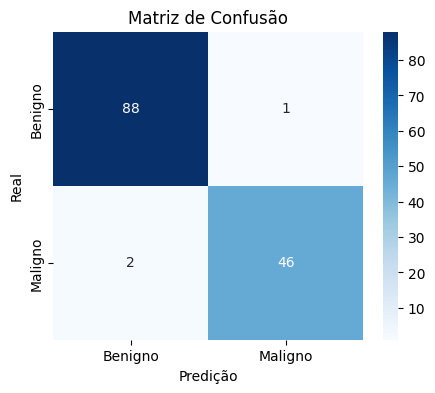

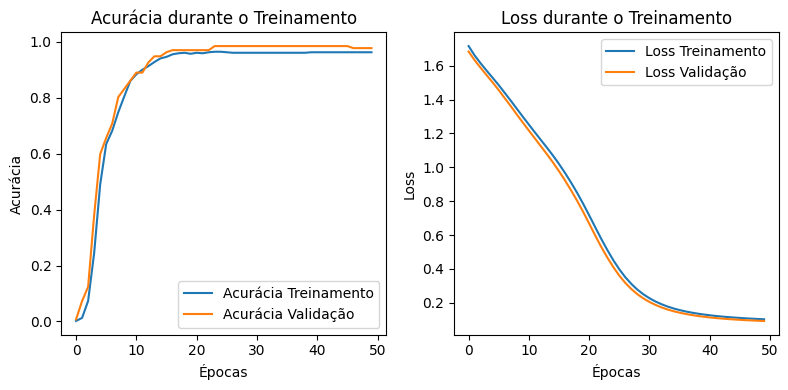

In [532]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss:.6f}')
print(f'Acc: {accuracy:.6f}')

# Predições
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benigno', 'Maligno'], yticklabels=['Benigno', 'Maligno'])
plt.xlabel('Predição')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


# Acc
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss Treinamento')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Exibindo os gráficos
plt.tight_layout()
plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


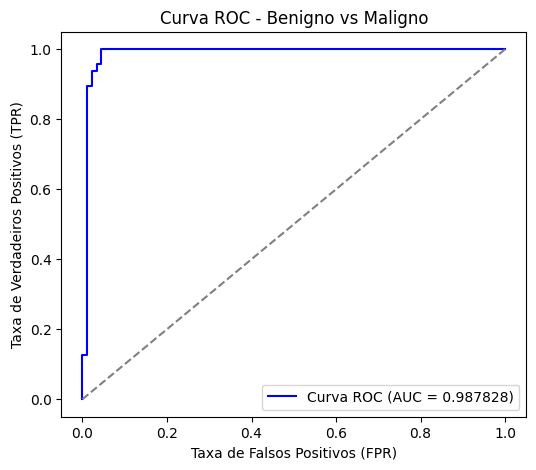

In [534]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Ajustando os rótulos: 2 -> 0 (Benigno), 4 -> 1 (Maligno)
y_true_bin = (y_true == 4).astype(int)  # Agora temos 0 para Benigno e 1 para Maligno

# Predições das probabilidades para a classe "Maligno"
y_prob = model.predict(X_test)

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_true_bin, y_prob[:, 1])  # Aqui, y_prob[:, 1] representa a probabilidade de "Maligno"
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {roc_auc:.6f})')

# Plotando a linha de aleatoriedade
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Definindo título e labels
plt.title('Curva ROC - Benigno vs Maligno')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend(loc='lower right')

# Exibindo o gráfico
plt.show()